In [1]:
import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Sigmoide

from loss.loss import MSELoss
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net
from utils.evaluation import accuracy

import numpy as np
import matplotlib.pyplot as plt

## Non linéaire : XOR 

100%|██████████| 1000/1000 [00:02<00:00, 411.54it/s]


Training completed.


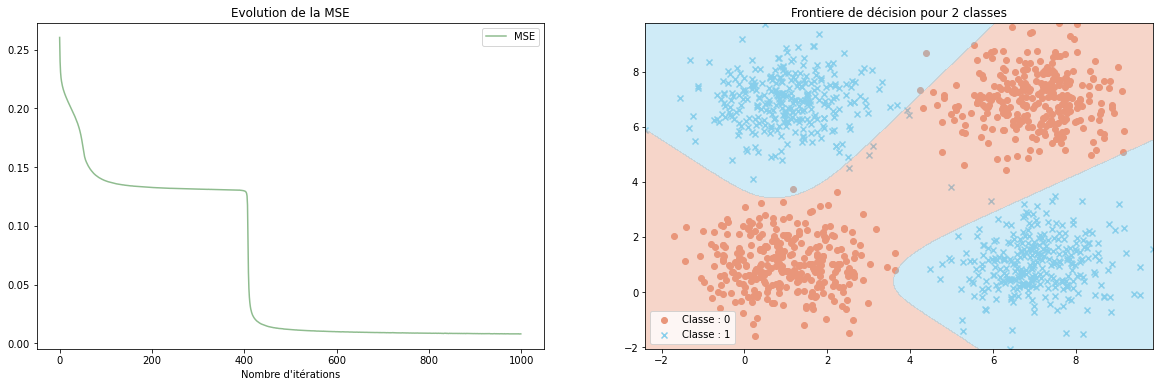

Accuracy : 0.9908333333333333


In [5]:
X, y = generate_data_gauss(300, [[1, 1], [7, 7], [1, 7], [7, 1]], [[[1, 0], [0, 1]]] * 4, labels=[0, 0, 1, 1])

hidden_neurons = 4
net = Sequentiel([
    Linear(2, hidden_neurons, bias=True),
    TanH(),
    Linear(hidden_neurons, 1, bias=True),
    Sigmoide(),
], neg_class=0)

optim = Optim(net, MSELoss(), eps=1e-3)
optim.SGD(X, y, batch_size=50, epochs=1000, verbose=False)

plot_net(X, y, net, optim.train_loss)
print("Accuracy :", accuracy(net, X, y))

100%|██████████| 200/200 [00:00<00:00, 4073.03it/s]


Training completed.


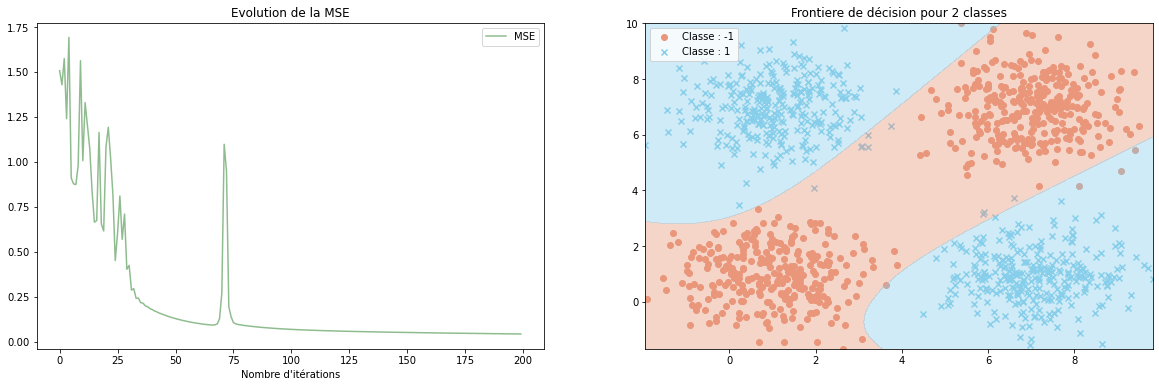

Accuracy : 0.9883333333333333


In [6]:
X, y = generate_data_gauss(300, [[1, 1], [7, 7], [1, 7], [7, 1]], [[[1, 0], [0, 1]]] * 4, labels=[-1, -1, 1, 1])

hidden_neurons = 4
net = Sequentiel([
    Linear(2, hidden_neurons, bias=True),
    Sigmoide(),
    Linear(hidden_neurons, 1, bias=True),
    TanH(),
])

optim = Optim(net, MSELoss(), eps=1e-3)
optim.SGD(X, y, batch_size=len(X), epochs=200, verbose=False)

plot_net(X, y, net, optim.train_loss)
print("Accuracy :", accuracy(net, X, y))

100%|██████████| 2000/2000 [00:00<00:00, 4632.40it/s]


Training completed.


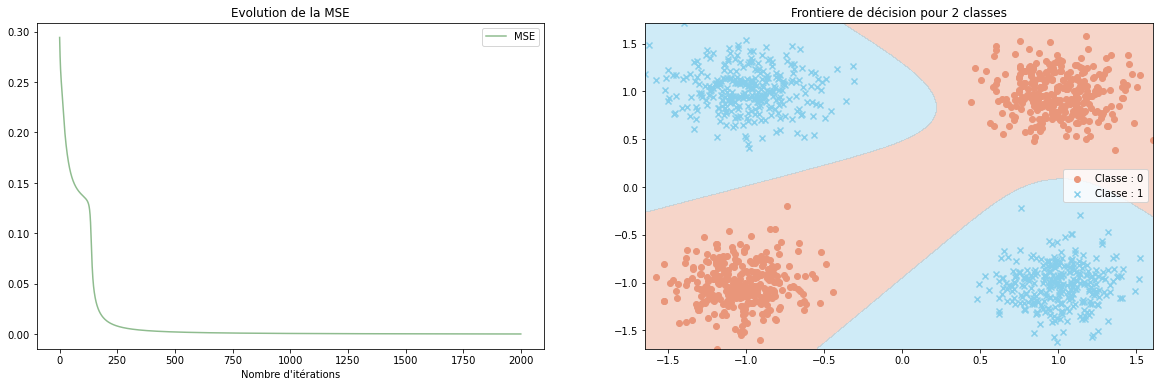

Accuracy : 1.0


In [4]:
X, y = generate_data_gauss(300, [[-1, -1], [1, 1], [-1, 1], [1, -1]], [[[0.05, 0], [0, 0.05]]] * 4, labels=[0, 0, 1, 1])

hidden_neurons = 4
net = Sequentiel([
    Linear(2, hidden_neurons, bias=True),
    TanH(),
    Linear(hidden_neurons, 1, bias=False),
    Sigmoide(),
], neg_class=0)

optim = Optim(net, MSELoss(), eps=1e-3)
optim.SGD(X, y, batch_size=len(X), epochs=2000, verbose=False)

plot_net(X, y, net, optim.train_loss)
print("Accuracy :", accuracy(net, X, y))